<a href="https://colab.research.google.com/github/leeminwoo40/yolov11/blob/main/yolov11_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

yolov11 image detect code


image 1/1 /content/1.jpg.heic: 640x320 7 persons, 1 bicycle, 1 motorcycle, 12.9ms
Speed: 3.2ms preprocess, 12.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 320)


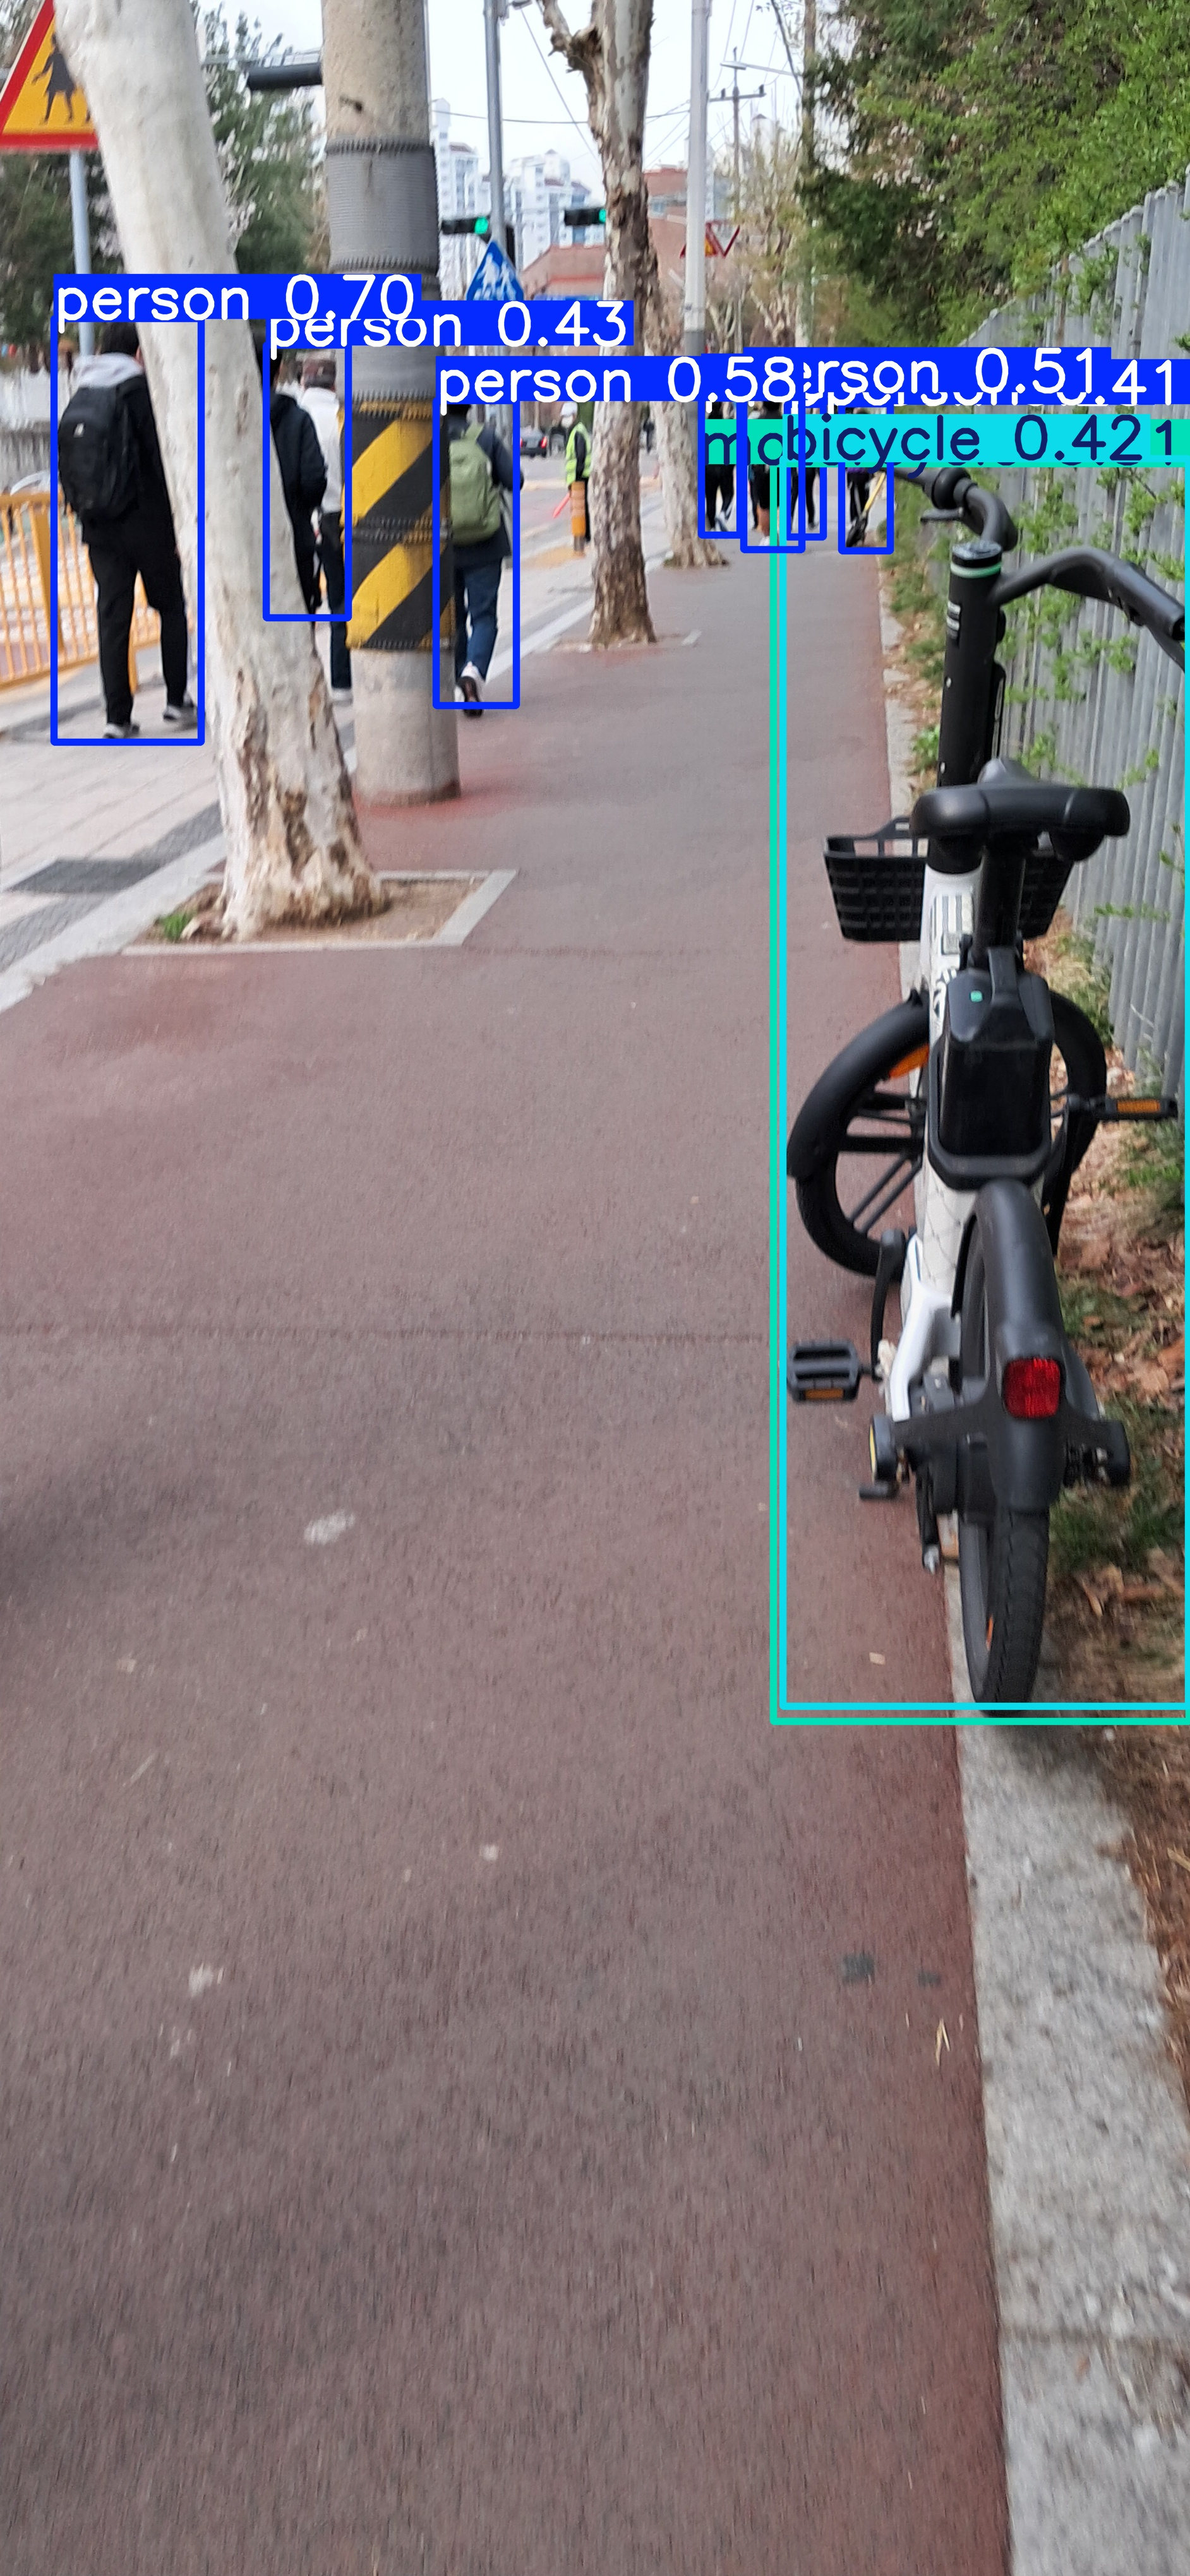

이미지에서 9개의 개체가 감지되었습니다.


In [ ]:
!pip install ultralytics

from ultralytics import YOLO
from IPython.display import display, Image

# 모델 로드
model = YOLO('/content/yolov8n.pt')  # 모델 경로를 적절히 수정해주세요.

# 이미지 로드
img_path = '/content/1.jpg.heic'  # 이미지 경로를 적절히 수정해주세요.

# 이미지 인식 수행
results = model(img_path)

# 결과를 이미지로 저장
results[0].save('/content/output.jpg')

# 결과 이미지를 Colab에서 보여주기
display(Image('/content/output.jpg'))

# 객체 수 세기
num_objects = len(results[0].boxes)
print(f"이미지에서 {num_objects}개의 개체가 감지되었습니다.")

In [ ]:
from google.colab import files
uploaded = files.upload()  # 여기서 '영상 분류영상.mp4'와 'yolov8x.pt'를 업로드

import cv2
from ultralytics import YOLO
from google.colab import files

# 모델 로드
model = YOLO('/content/yolov8x.pt')

# 영상 파일 경로
video_path = '/content/영상 분류영상.mp4'

# 영상 파일 열기
cap = cv2.VideoCapture(video_path)

# 영상의 프레임 크기와 FPS 정보 가져오기
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# 결과를 저장할 비디오 파일 설정
output_path = '/content/output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' codec 사용
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# 영상 프레임을 하나씩 처리
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO 모델을 사용하여 객체 감지
    results = model(frame)

    # 인식 결과를 이미지에 표시
    annotated_frame = results.plot()  # 결과를 프레임에 오버레이

    # 결과 프레임을 output.mp4에 기록
    out.write(annotated_frame)

# 자원 해제
cap.release()
out.release()

# 결과 영상 파일 보여주기
from IPython.display import Video
Video(output_path, embed=True)  # embed=True 추가


Saving 분류영상.mp4 to 분류영상 (2).mp4
